In [1]:
import pandas as pd
import numpy as np
import graphviz 
import matplotlib.pyplot as plt
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

intention = pd.read_csv('/Volumes/Dam/홍익대학교/교과목/홍익대학교3-2/데이터마이닝/프로젝트/online_shoppers_intention.csv')
intention

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [2]:
intention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [3]:
intention.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [4]:
intention['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [5]:
intention_target = intention['Revenue']
intention_target = intention_target.astype(str)
intention_data = intention.drop('Revenue', axis=1)
label = LabelEncoder()
intention_target = label.fit_transform(intention_target)

In [6]:
label.classes_

array(['False', 'True'], dtype=object)

In [7]:
corr_matrix = intention.corr()
corr_matrix['Revenue'].sort_values(ascending=False)  # PageValues가 가장 관계 있음

Revenue                    1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Weekend                    0.029295
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
Name: Revenue, dtype: float64

In [8]:
intention_data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

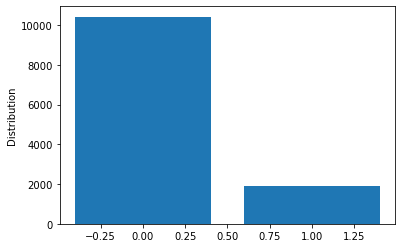

In [9]:
# plot the class distribution
data = intention['Revenue'].astype('object')
class_dict = data.value_counts()
plt.bar(class_dict.index, class_dict)
plt.ylabel('Distribution')
plt.show()

In [10]:
intention_data['VisitorType'] = intention_data['VisitorType'].replace('Other', 'New_Visitor')
intention_data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1779
Name: VisitorType, dtype: int64

In [11]:
numeric_features = ['Administrative','Administrative_Duration','Informational', 
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                    'BounceRates', 'ExitRates', 'PageValues', ]
categorical_features = ['SpecialDay','OperatingSystems','Browser','Region','TrafficType']
ordinal_features = ['Month', 'VisitorType', 'Weekend']

In [12]:
preprocessor = ColumnTransformer(
    transformers=[ 
        # use StandardScaler for 연속
        ('StandardScaler', StandardScaler(), numeric_features),
        # use OneHotEncoder for 범주
        ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('OrdinalEncoder', OrdinalEncoder(categories=[
            ['Feb', 'Mar', 'May', 'Nov', 'Dec', 'Oct', 'Sep', 'Aug', 'Jul', 'June'],
            ['Returning_Visitor', 'New_Visitor'],
            [False, True]
        ]),ordinal_features) ])

In [13]:
for depth in range(1, 9):
    estimator = DecisionTreeClassifier(max_depth=depth, random_state=42)
    pipeline = Pipeline([('preprocessing', preprocessor), ('clf', estimator)])
    
    accuracy = cross_val_score(pipeline, intention_data, intention_target, cv=10, scoring='accuracy')
    print("max_depth={}: {}% accuracy".format(depth, accuracy.mean()*100))

max_depth=1: 87.39659367396595% accuracy
max_depth=2: 88.78345498783456% accuracy
max_depth=3: 87.22627737226277% accuracy
max_depth=4: 88.63746958637468% accuracy
max_depth=5: 88.82400648824007% accuracy
max_depth=6: 88.73479318734793% accuracy
max_depth=7: 88.45093268450933% accuracy
max_depth=8: 88.1265206812652% accuracy


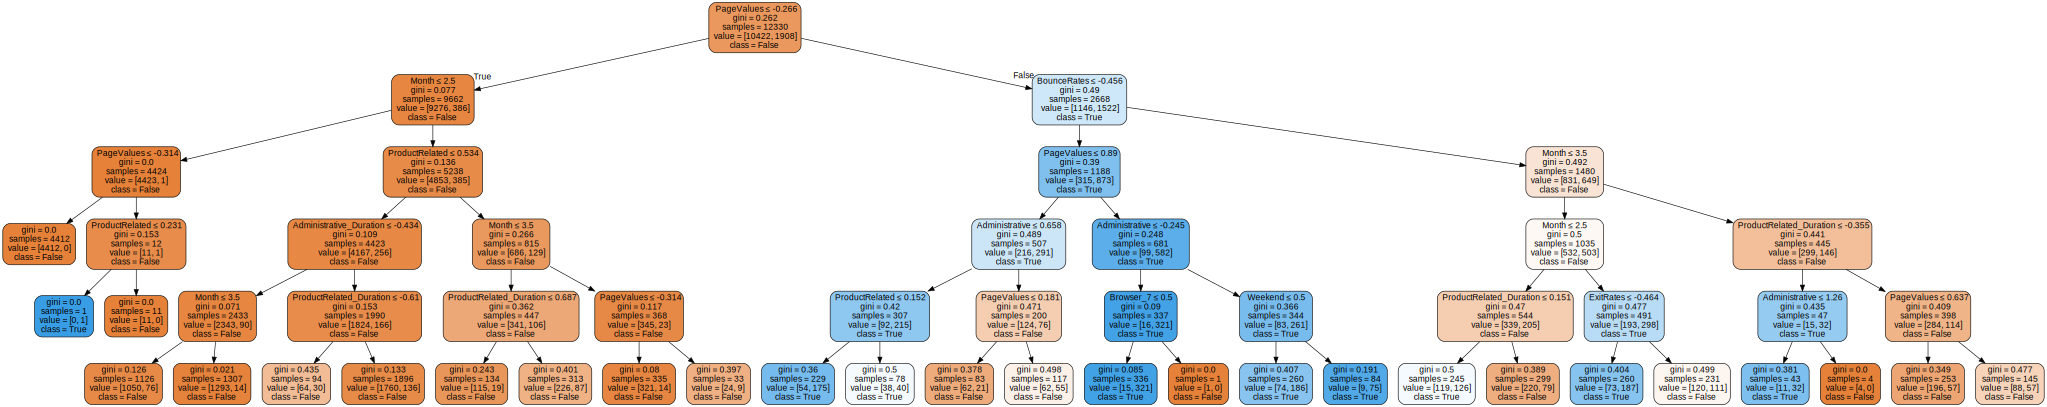

In [14]:
estimator = DecisionTreeClassifier(max_depth=5, random_state=42)
pipeline = Pipeline([('preprocessing', preprocessor), ('clf', estimator)])
pipeline.fit(intention_data, intention_target)

pre = pipeline.named_steps['preprocessing']
feature_names = numeric_features + list(pre.named_transformers_['OneHotEncoder'].get_feature_names(categorical_features)) + ordinal_features

# plot the decision tree
dot_data = tree.export_graphviz(estimator,
                               out_file = None,
                               feature_names = feature_names,
                               class_names = label.classes_,
                               filled = True,
                               rounded = True,
                               special_characters = True)

graph = graphviz.Source(dot_data)              
graph

In [15]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

DecisionTree = DecisionTreeClassifier(max_depth=3)
pipeline = Pipeline([ ('preprocessing', preprocessor), ('DecisionTree', DecisionTree) ])
prediction = cross_val_predict(pipeline, intention_data, intention_target, cv=cv)
acc = accuracy_score(intention_target, prediction)
print("Decision Tree with accuracy of {}".format(acc))

Decision Tree with accuracy of 0.8879156528791565


In [16]:
from numpy import interp
from sklearn.metrics import roc_curve, auc

def avg_roc(cv, estimator, data, target, pos_label):
    mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]
    tprs = []
    aucs = []
    
    for train_indices, test_indices in cv.split(data, target):
        train_data = data.iloc[train_indices]
        train_target = target[train_indices]
        estimator.fit(train_data, train_target)

        test_data = data.iloc[test_indices]
        test_target = target[test_indices]
        decision_for_each_class = estimator.predict_proba(test_data)#have to use predict_proba or decision_function 
    
        fpr, tpr, thresholds = roc_curve(test_target, decision_for_each_class[:,1], pos_label=pos_label)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0 # tprs[-1] access the last element
        aucs.append(auc(fpr, tpr))
        
        #plt.plot(fpr, tpr)# plot for each fold
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0 # set the last tpr to 1
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    return mean_fpr, mean_tpr, mean_auc, std_auc

RandomForest with accuracy of 0.9019464720194648


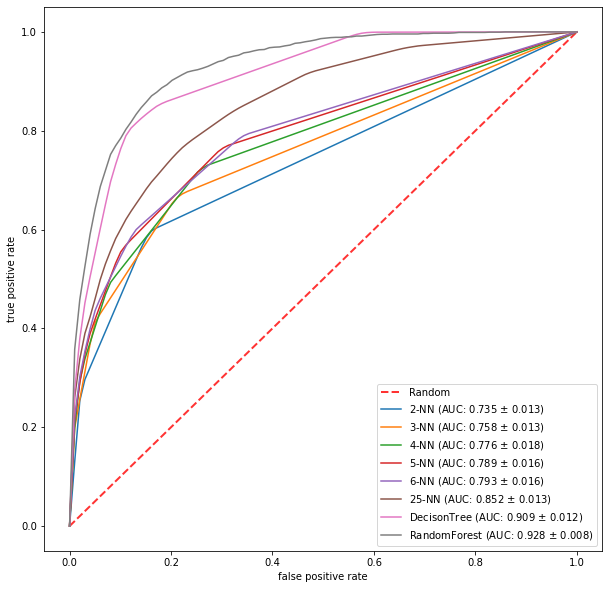

In [17]:
# define the cross validation folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create the pipeline, we will set the estimator later
pipeline = Pipeline([ ('preprocessing', preprocessor), ('estimator', None) ])

# setup a figure
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8) # draw diagonal

# KNN
for n_neighbour in [2,3,4,5,6,25]:
    knn_estimator = KNeighborsClassifier(n_neighbour)
    pipeline = Pipeline([ ('preprocessing', preprocessor), ('KNN', knn_estimator) ])
    mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, intention_data, intention_target, 1)
    plt.plot(mean_fpr, mean_tpr, label='{}-NN (AUC: {:.3f} $\pm$ {:.3f})'.format(n_neighbour, mean_auc, std_auc))

# Decision Tree
DecisionTree = DecisionTreeClassifier(max_depth=3)
pipeline = Pipeline([ ('preprocessing', preprocessor), ('DecisionTree', DecisionTree) ])
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, intention_data, intention_target, 1)
plt.plot(mean_fpr, mean_tpr, label='DecisonTree (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))

# Random Forest
RandomForest = RandomForestClassifier(bootstrap=False,
                               criterion='entropy',
                               max_depth= 100, 
                               max_features='sqrt', 
                               min_samples_leaf=1, 
                               min_samples_split=25, 
                               n_estimators=800)
pipeline = Pipeline([ ('preprocessing', preprocessor), ('RandomForest', RandomForest) ])
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, intention_data, intention_target, 1)
plt.plot(mean_fpr, mean_tpr, label='RandomForest (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))
prediction = cross_val_predict(pipeline, intention_data, intention_target, cv=cv)
acc = accuracy_score(intention_target, prediction)
print("RandomForest with accuracy of {}".format(acc))

# show the plot
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

In [18]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [22]:
label = LabelEncoder()
intention_target = label.fit_transform(intention_target)
label_names = [0, 1]
label_order = label.transform(label_names)

# 가장 좋은 K값 찾기
for i in range(10, 101, 15):
    knn_estimator = KNeighborsClassifier(i)
    pipeline = Pipeline([ ('preprocessing', preprocessor), ('KNN', knn_estimator) ])

    # Plot confusion matrix and classification report for the two most promising approaches
    prediction = cross_val_predict(pipeline, intention_data, intention_target, cv=cv)
    cm = confusion_matrix(intention_target, prediction, labels=label_order)
    #plot_confusion_matrix(cm, classes=label_names, title='KNeighborsClassifier')

    acc = accuracy_score(intention_target, prediction)
    print("{}-NN with accuracy of {}".format(i, acc))

10-NN with accuracy of 0.8770478507704785
25-NN with accuracy of 0.8789132197891322
40-NN with accuracy of 0.8775344687753447
55-NN with accuracy of 0.878102189781022
70-NN with accuracy of 0.8764801297648013
85-NN with accuracy of 0.875669099756691
100-NN with accuracy of 0.875669099756691


KNN with accuracy of 0.8789132197891322


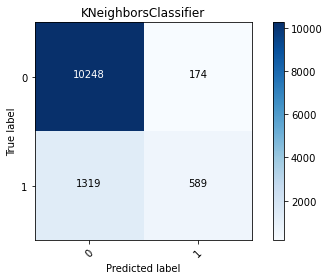

In [20]:
# KNN
knn_estimator = KNeighborsClassifier(25)
pipeline = Pipeline([ ('preprocessing', preprocessor), ('KNN', knn_estimator) ])

# Plot confusion matrix and classification report for the two most promising approaches
prediction = cross_val_predict(pipeline, intention_data, intention_target, cv=cv)
cm = confusion_matrix(intention_target, prediction, labels=label_order)
plot_confusion_matrix(cm, classes=label_names, title='KNeighborsClassifier')

acc = accuracy_score(intention_target, prediction)
print("KNN with accuracy of {}".format(acc))

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'RandomOverSampler()' (type <class 'imblearn.over_sampling._random_over_sampler.RandomOverSampler'>) doesn't

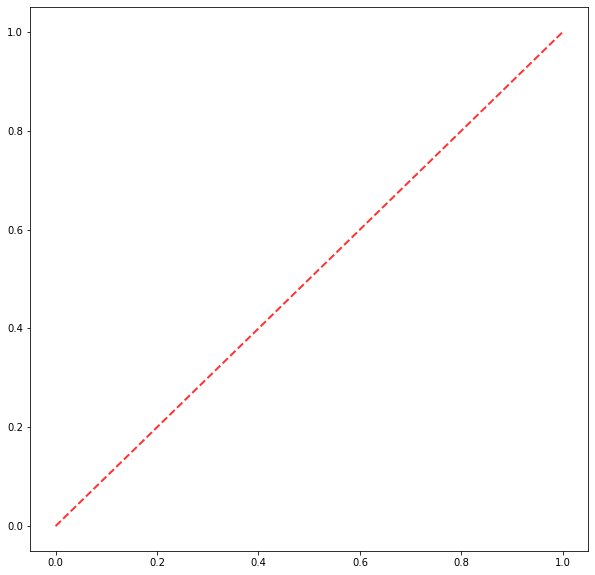

In [23]:
# OverSampler()
# define the cross validation folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create the pipeline, we will set the estimator later
pipeline = Pipeline([ ('preprocessing', preprocessor), ('estimator', None) ])

# setup a figure
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8) # draw diagonal


# KNN
knn_estimator = KNeighborsClassifier(25)
pipeline = Pipeline([ ('preprocessing', preprocessor),
                     ('over',RandomOverSampler()), 
                     ('KNN', knn_estimator) ])
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, intention_data, intention_target, 1)
plt.plot(mean_fpr, mean_tpr, label='{}-NN (AUC: {:.3f} $\pm$ {:.3f})'.format(n_neighbour, mean_auc, std_auc))


# Decision Tree
DecisionTree = DecisionTreeClassifier(max_depth=3)
pipeline = Pipeline([ ('preprocessing', preprocessor),
                     ('over',RandomOverSampler()), 
                     ('DecisionTree', DecisionTree) ])
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, intention_data, intention_target, 1)
plt.plot(mean_fpr, mean_tpr, label='DecisonTree (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))


# Random Forest
RandomForest = RandomForestClassifier(bootstrap=False,
                               criterion='entropy',
                               max_depth= 100, 
                               max_features='sqrt', 
                               min_samples_leaf=1, 
                               min_samples_split=25, 
                               n_estimators=800)
pipeline = Pipeline([ ('preprocessing', preprocessor),
                     ('over',RandomOverSampler()), 
                     ('RandomForest', RandomForest) ])
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, intention_data, intention_target, 1)
plt.plot(mean_fpr, mean_tpr, label='RandomForest (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))
prediction = cross_val_predict(pipeline, intention_data, intention_target, cv=cv)
acc = accuracy_score(intention_target, prediction)
print("RandomForest with accuracy of {}".format(acc))


# show the plot
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'RandomOverSampler()' (type <class 'imblearn.over_sampling._random_over_sampler.RandomOverSampler'>) doesn't

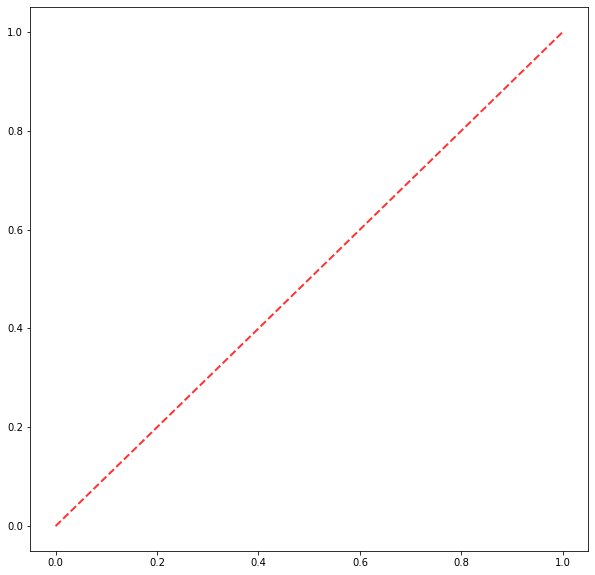

In [24]:
# UnderSampler()
# define the cross validation folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create the pipeline, we will set the estimator later
pipeline = Pipeline([ ('preprocessing', preprocessor), ('estimator', None) ])

# setup a figure
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8) # draw diagonal

# KNN
knn_estimator = KNeighborsClassifier(25)
pipeline = Pipeline([ 
    ('balancing', RandomOverSampler()),
    ('preprocessing', preprocessor), 
    ('estimator', knn_estimator) ])
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, intention_data, intention_target, 1)
plt.plot(mean_fpr, mean_tpr, label='{}-NN (AUC: {:.3f} $\pm$ {:.3f})'.format(n_neighbour, mean_auc, std_auc))


# Decision Tree
DecisionTree = DecisionTreeClassifier(max_depth=3)
pipeline = Pipeline([ 
    ('balancing', RandomOverSampler()),
    ('preprocessing', preprocessor), 
    ('DecisionTree', DecisionTree) ])
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, intention_data, intention_target, 1)
plt.plot(mean_fpr, mean_tpr, label='DecisonTree (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))


# Random Forest
RandomForest = RandomForestClassifier(bootstrap=False,
                               criterion='entropy',
                               max_depth= 100, 
                               max_features='sqrt', 
                               min_samples_leaf=1, 
                               min_samples_split=25, 
                               n_estimators=800)
pipeline = Pipeline([ 
    ('balancing', RandomOverSampler()),
    ('preprocessing', preprocessor),  
    ('RandomForest', RandomForest) ])
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, intention_data, intention_target, 1)
plt.plot(mean_fpr, mean_tpr, label='RandomForest (AUC: {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc))
prediction = cross_val_predict(pipeline, intention_data, intention_target, cv=cv)
acc = accuracy_score(intention_target, prediction)
print("RandomForest with accuracy of {}".format(acc))


# show the plot
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()